2*x - 5
2.471176962384829


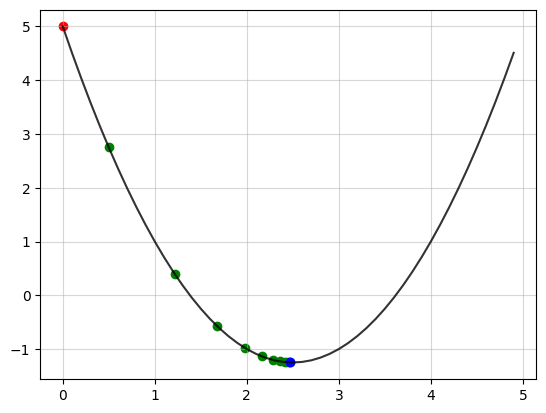

In [9]:
import time 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sympy as sp

# random functions with sympy
x = sp.Symbol('x')
f = x**2 - 5*x + 5
df = sp.diff(f, x)
print(df)

# convert to numpy functions
f = sp.lambdify(x, f, 'numpy')
df = sp.lambdify(x, df, 'numpy')

N = 20 # number of iterations
x_0 = 0 # start value
cs = 0.1 # convergence step

x_plt = np.arange(0, 5.0, 0.1)
f_plt = np.array([f(x) for x in x_plt])

# creating the window with figure (fig) and the axis (ax)
fig, ax = plt.subplots() 
ax.grid(True, alpha=0.5)
sns.lineplot(x=x_plt, y=f_plt, c='black', alpha=0.8) # parabola
ax.scatter(x=x_0, y=f(x_0), c='red')
mn = 100

for i in range(N):
    # cs = 1 / min(i + 1, mn)
    x_0 = x_0 - cs * df(x_0) # changing the argument (with sign due to normalization)
    
    # showing intermediate points
    if i % 2 == 0:
        ax.scatter(x_0, f(x_0), c='green')

print(x_0)
ax.scatter(x_0, f(x_0), c='blue')
plt.show()


# Problem with local minimum

In [ ]:
import time 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sympy as sp

def funcPlot(func, x_0 = 0, N = 20, cs = 0.1):
    f = func
    df = sp.diff(f, x)
    print(df)

    f = sp.lambdify(x, f, 'numpy')
    df = sp.lambdify(x, df, 'numpy')

    x_plt = np.arange(-5.0, 5.0, 0.1)
    f_plt = np.array([f(x) for x in x_plt])

    fig, ax = plt.subplots() 
    ax.grid(True, alpha=0.5)
    sns.lineplot(x=x_plt, y=f_plt, c='black', alpha=0.8)
    ax.scatter(x=x_0, y=f(x_0), c='red')
    mn = 100

    for i in range(N):
        cs = 1 / min(i + 1, mn)
        x_0 = x_0 - cs * np.sign(df(x_0)) # changing the argument (with sign-function due to normalization)

        if i % 2 == 0:
            ax.scatter(x_0, f(x_0), c='green')

    print(x_0)
    ax.scatter(x_0, f(x_0), c='blue')
    plt.show()


cos(x) + 0.5
-2.094582726355172


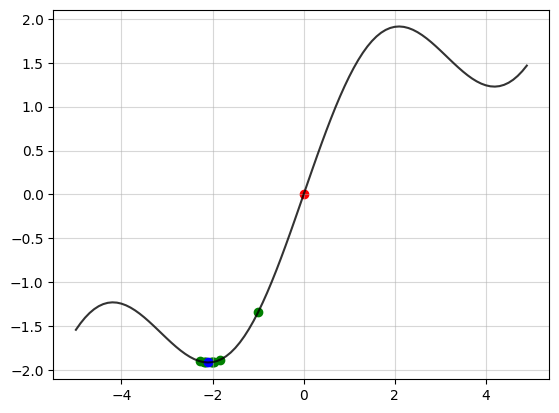

In [3]:
x = sp.Symbol('x')
funcPlot(func = sp.sin(x) + 0.5 * x)

cos(x) + 0.5
4.168771403175428


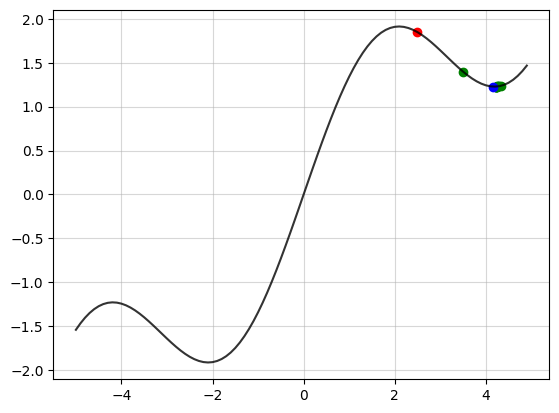

In [5]:
x = sp.Symbol('x')
funcPlot(func = sp.sin(x) + 0.5 * x, x_0 = 2.5)

# W-searching

<img src=".././photo/condition3.png" alt="photo" width="700" height="500">

In [24]:
import numpy as np

# исходная функция, которую нужно аппроксимировать моделью a(x)
def func(x):
    return 0.1 * x**2 - np.sin(x) + 5.

coord_x = np.arange(-5.0, 5.0, 0.1) # значения по оси абсцисс [-5; 5] с шагом 0.1
coord_y = func(coord_x) # значения функции по оси ординат

sz = len(coord_x)	# количество значений функций (точек)
eta = np.array([0.1, 0.01, 0.001, 0.0001]) # шаг обучения для каждого параметра w0, w1, w2, w3
w = np.array([0., 0., 0., 0.]) # начальные значения параметров модели
N = 200 # число итераций градиентного алгоритма

s = np.array([[1, x, x**2, x**3] for x in coord_x]) # the vector for the polynomial

for n in range(N):
    dQ = np.zeros(4) # it's vector-gradient by w

    for i in range(sz):
        exp1 = np.dot(w, s[i]) - coord_y[i]
        exp2 = np.dot(exp1, s[i])
        
        dQ += exp2

    dQ = dQ * 2 / sz

    # w-updating with gradient
    w = w - eta * dQ # it's not np.dot(), which gives the scalar, it's vector in output (eta[0] * w[0], eta[1] * w[1]...), NOT eta[0]*w[0] + eta[1] * w[1] + ...
    
# searching Q - avg emp risk
a = lambda x: np.dot(w, x)
Q = 0
for i in range(sz):
    Q += (a(s[i]) - func(coord_x[i])) ** 2
Q /= sz

print(w)
print(Q)

[-1.00009129e+118 -1.00009129e+118 -1.00009129e+118 -1.00009129e+118]
2.56939149782966e+239
